## Re-plotting pLDDT scores

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Importing plddt.csv
csv_path = input('Input the path to your plddt csv file: ')
filename = csv_path.split('/')[-1]
outpath = csv_path.replace(filename,'')

df = pd.read_csv(csv_path)
df = df.set_index('Unnamed: 0')
df_xy = df.transpose(copy=True)
df_xy = df_xy.rename_axis(columns={'Unnamed: 0':"AA"})
df_xy.head()

AA,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,33.417539,31.982314,32.775028,31.750380,32.670368,32.013006,32.421583,31.333783,30.498148,30.654855,...,33.759481,26.250445,30.631366,26.495754,31.524340,27.541056,31.218718,28.236367,30.705546,31.082506
2,37.533120,35.155347,35.648503,34.480532,35.640461,35.877726,44.105327,34.699854,33.668925,35.384432,...,35.196360,28.490695,32.520898,27.483978,32.921024,28.695975,31.885827,29.709616,32.023850,32.107467
3,46.185139,44.705705,44.502795,42.868815,45.757756,38.771594,47.950495,38.029853,35.937037,45.005776,...,37.899531,30.877991,35.047245,30.384086,35.276199,31.960534,33.972959,33.046432,34.115551,34.398576
4,44.495886,43.261100,43.856812,42.124500,43.701688,37.834549,41.556539,37.329117,35.253310,44.050617,...,36.130663,31.027713,33.956206,30.947621,33.240736,32.367201,32.503603,30.600860,32.434864,32.660642


In [3]:
df_xy

AA,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,33.417539,31.982314,32.775028,31.750380,32.670368,32.013006,32.421583,31.333783,30.498148,30.654855,...,33.759481,26.250445,30.631366,26.495754,31.524340,27.541056,31.218718,28.236367,30.705546,31.082506
2,37.533120,35.155347,35.648503,34.480532,35.640461,35.877726,44.105327,34.699854,33.668925,35.384432,...,35.196360,28.490695,32.520898,27.483978,32.921024,28.695975,31.885827,29.709616,32.023850,32.107467
3,46.185139,44.705705,44.502795,42.868815,45.757756,38.771594,47.950495,38.029853,35.937037,45.005776,...,37.899531,30.877991,35.047245,30.384086,35.276199,31.960534,33.972959,33.046432,34.115551,34.398576
4,44.495886,43.261100,43.856812,42.124500,43.701688,37.834549,41.556539,37.329117,35.253310,44.050617,...,36.130663,31.027713,33.956206,30.947621,33.240736,32.367201,32.503603,30.600860,32.434864,32.660642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,16.239674,28.404087,19.004217,18.507167,17.434291,16.889341,28.573053,19.874766,16.894074,27.079265,...,16.505312,16.423897,20.248005,18.157250,17.871844,21.602732,15.248579,17.673117,17.079777,15.447285
1708,16.701158,26.297326,16.700214,17.022934,17.821907,16.991000,23.580691,17.716987,16.020327,24.277118,...,15.274875,16.137453,18.311333,17.292335,17.947274,17.955461,14.759428,18.322472,17.498880,18.151655
1709,16.917194,25.669324,18.007563,17.262863,16.252854,16.023166,25.734156,18.022123,16.147023,27.638935,...,14.660988,16.693403,18.039945,17.144208,16.933519,18.270114,14.361017,17.168366,17.255020,15.688468
1710,17.737509,27.242078,19.280850,18.289188,18.351414,18.635633,29.254289,19.780190,17.618760,27.488379,...,15.496557,16.275410,17.475444,17.024664,17.488304,19.364862,15.572951,18.032791,18.814078,16.359622


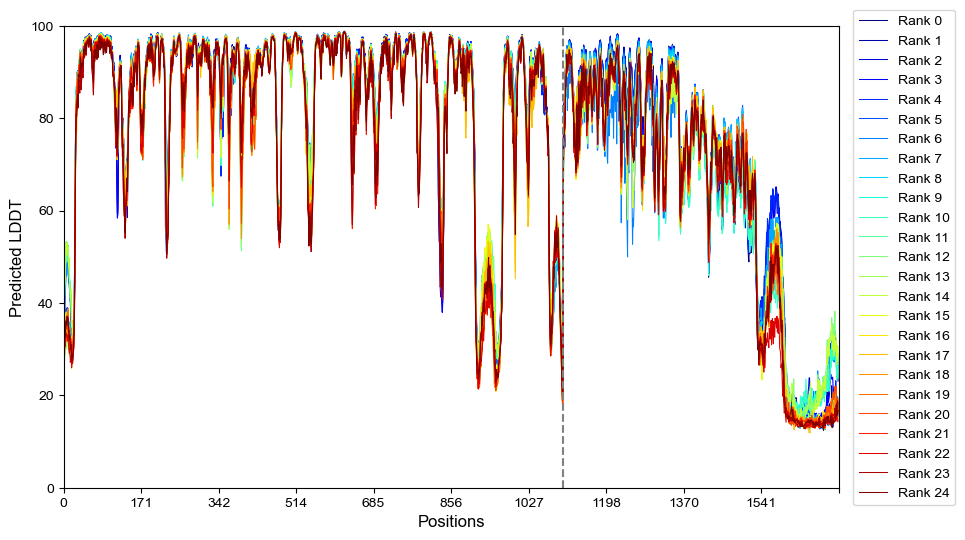

In [4]:
# Plotting top-ranked prediction pLDDT scores
max_rank = input('How many of the top-ranked predictions would you like to plot? ')
if max_rank == '':
    rank_range = np.arange(0,25,1)
    NUM_COLORS = 25
else:
    rank_range = np.arange(0,int(max_rank),1)
    NUM_COLORS = int(max_rank)
#cm = plt.get_cmap('gist_rainbow') #color option 1
#cm = sns.color_palette('husl', n_colors = NUM_COLORS) #color option 2
cm = plt.cm.jet(np.linspace(0,1,NUM_COLORS)) #color option 3

fig, ax = plt.subplots(figsize=(10,6))
# Set fontface
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams["mathtext.default"] = "regular"
# Set colours
#matplotlib.rcParams['axes.prop_cycle'] = 
#ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in rank_range:
    ax.plot(df_xy[i], label='Rank '+str(i), color=cm[i], linewidth=.75)

ax.set_ylabel('Predicted LDDT', fontsize=12)
ax.set_xlabel('Positions', fontsize=12)
ax.legend(bbox_to_anchor=(1.01, 1.05))
#ax.xaxis.set_major_locator(plt.MaxNLocator(df_xy.shape[0]/))
ax.set_ylim(top=100)
xrange = input('What range of residues do you want to plot (e.g. "0-100" – leave blank for all): ')
if xrange == '':
    xmin, xmax = 0, df_xy.shape[0]
else:
    xrng = xrange.split('-')
    xmin, xmax = int(xrng[0]), int(xrng[1])

horizLine = input('Plot a vertical divider? (y/n)')
if horizLine == 'y':
    ax.axvline(int(input('Which position? ')), color='gray', linestyle='--')

ax.set_xlim(xmin,xmax)
ax.set_ylim(0,100)
ax.set_xticks(np.round(np.linspace(xmin, xmax, 11), 2))
#1103.5
outpath = csv_path.replace(filename,'')
#plt.savefig(f"{outpath}plddt-replot.pdf")   #<-- Remove #'s on this line to automatically save the figure as .pdf

In [5]:
avgsIPL=[]
df_IPL = df_xy.iloc[904:974]
for row in df_IPL:
    avgsIPL.append(np.mean(df_IPL[row]))
print('Max. avg. pLDDT =',max(avgsIPL), ': Ranked',avgsIPL.index(max(avgsIPL)))

Max. avg. pLDDT = 47.16086317644407 : Ranked 6


In [6]:
avgs=[]
for ranked in df_xy:
    avgs.append(np.mean(df_xy[ranked]))
max_pLDDT = max(avgs)
print('Max. avg. pLDDT =',max_pLDDT, ': Ranked',avgs.index(max_pLDDT))

Max. avg. pLDDT = 78.08991993853375 : Ranked 5


In [ ]:
avgs[0]

63.93648800172401